In [1]:
import numpy as np
import pandas as pd

# from atomic_forces.average_atom.python.average_atom import NeutralPseudoAtom as NPA
from atomic_forces.average_atom.python.average_atom_geometric import NeutralPseudoAtom as NPA
from atomic_forces.average_atom.python.average_atom_geometric import load_NPA
from atomic_forces.average_atom.python.misc import jacobi_relaxation, sor
from atomic_forces.average_atom.python.grids import NonUniformGrid
# from atomic_forces.average_atom.python.average_atom import load_NPA
from atomic_forces.atomOFDFT.python.physics import ThomasFermi, FermiDirac

from importlib import reload
try:
    reload(physics)
    reload(grids)
    reload(average_atom_geometric)
#     reload(average_atom)
    reload(misc)
except NameError as e:
    from atomic_forces.atomOFDFT.python import physics as physics
    from atomic_forces.average_atom.python import average_atom_geometric as average_atom_geometric
#     from atomic_forces.average_atom.python import average_atom as average_atom
    from atomic_forces.average_atom.python import misc as misc
    from atomic_forces.average_atom.python import grids as grids
    print("Error: ",e)
except Exception as e:
    print("Unexpected error during reload")
    print(e)


import matplotlib.pyplot as plt

from hnc.hnc.constants import *

import cProfile



ModuleNotFoundError: No module named 'mendeleev'
Error:  name 'physics' is not defined


In [19]:
# Aluminum 
name='Al'
Z, A = 13, 27 
T_eV = 1 
T_AU = T_eV*eV_to_AU
rs = 2.985767276908717

####
R = 10*rs

aa_tfd = NPA(Z, A, T_AU, rs, R, initialize=True, gradient_correction=None, μ_init = 0.158, Zstar_init = 4.2, rmin=2e-2 ,Npoints=500, name=name,ignore_vxc=False)

Intializing grid
Loading Data for Comparison (from George Petrov)
Z err: 0.004210521971535206
Intialized Potentials and Densities


/home/zach/plasma/atomic_forces/GordonKim/python/atoms.py:75: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Z_unnorm, err = quad(rho_integrand, 0, self.rs, limit=500, epsabs=1e-5, epsrel=1e-5)


### Thomas Fermi (TF)

In [20]:
aa_tfd.solve_TF(verbose=True, picard_alpha=1e-2, tol=1e-4)
aa_tfd.update_bound_free()

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	Gmres code: 0
	mu =     0.2566
	Poisson Err =  3.309e-11, rho Err =  3.319e-03
	Q = -3.183e-12 ->  9.095e-13, 
	Change =  5.858e-01
__________________________________________
TF Iteration 1
	Gmres code: 0
	mu =     0.2455
	Poisson Err =  8.580e-12, rho Err =  2.375e-03
	Q = -5.912e-12 ->  0.000e+00, 
	Change =  3.670e-02
__________________________________________
TF Iteration 2
	Gmres code: 0
	mu =     0.2391
	Poisson Err =  1.603e-12, rho Err =  2.006e-03
	Q = -3.638e-12 ->  4.547e-13, 
	Change =  2.531e-02
__________________________________________
TF Iteration 3
	Gmres code: 0
	mu =     0.2368
	Poisson Err =  1.487e-11, rho Err =  1.899e-03
	Q = -6.366e-12 ->  0.000e+00, 
	Change =  1.211e-02
__________________________________________
TF Iteration 4
	Gmres code: 0
	mu =     0.2363
	Poisson Err =  1.345e-12, rho Err =  1.832e-03
	Q = -3.638e-12 -> -4

/home/zach/plasma/atomic_forces/atomOFDFT/python/physics.py:93: RuntimeWarning: overflow encountered in exp
  integrand = lambda x:  (x**0.5/(np.exp(x-eta) + 1)).real


-1648.913545075836

In [21]:
def fix_bound_free(aa, index_type='min'):
    if index_type=='min':
        cutoff_index = np.argmin(aa.φe + aa.φion -aa.vxc_f(aa.ne))
    elif index_type=='rs':
        cutoff_index = aa.rws_index
        cutoff_index=-1
    φ_shift =  aa.φe[cutoff_index] + aa.φion[cutoff_index] -aa.vxc_f(aa.ne)[cutoff_index] # Can escape rs
    
    if aa.gradient_correction is not None:
        φ_shift +=  - aa.get_gradient_energy(aa.ne)  # Can escape rs
        
    aa.Zstar = aa.update_bound_free(φ_shift)
    # Zstar = aa.update_bound_free(φ_shift)
    print(f"Input was Zstar={aa_tfd.Zstar:0.3f}, output is {aa.Zstar:0.3f}.")
    
fix_bound_free(aa_tfd, index_type='rs')
aa_tfd.Zstar

Input was Zstar=4.149, output is 4.149.


4.148507217155048

In [5]:
aa_tfd.run_empty_TF(verbose=True, picard_alpha=2e-3, tol=1e-4)

Beginning self-consistent electron solver.
_________________________________
__________________________________________
TF Iteration 0
	Gmres code: 0
	mu =     0.1580
	Poisson Err =        nan, rho Err =  8.126e-03
	Q =  4.484e+02 -> -2.060e+00, 
	Change =  9.408e-01
__________________________________________
TF Iteration 1
	Gmres code: 0
	mu =     0.1580
	Poisson Err = -4.998e-10, rho Err =  6.520e-03
	Q =  3.571e+02 -> -1.342e+00, 
	Change =  2.746e-02
__________________________________________
TF Iteration 2
	Gmres code: 0
	mu =     0.1580
	Poisson Err = -2.727e-10, rho Err =  5.262e-03
	Q =  2.805e+02 -> -7.788e-01, 
	Change =  2.486e-02
__________________________________________
TF Iteration 3
	Gmres code: 0
	mu =     0.1580
	Poisson Err = -3.354e-10, rho Err =  4.297e-03
	Q =  2.171e+02 -> -3.432e-01, 
	Change =  2.242e-02
__________________________________________
TF Iteration 4
	Gmres code: 0
	mu =     0.1580
	Poisson Err = -3.760e-10, rho Err =  3.572e-03
	Q =  1.653e+02 -> -1

/home/zach/plasma/atomic_forces/average_atom/python/average_atom_geometric.py:449: RuntimeWarning: divide by zero encountered in divide
  rel_errs = (np.abs(A @ φe - b)[:-1]/b[:-1])
/home/zach/plasma/atomic_forces/average_atom/python/average_atom_geometric.py:449: RuntimeWarning: invalid value encountered in divide
  rel_errs = (np.abs(A @ φe - b)[:-1]/b[:-1])


__________________________________________
TF Iteration 50
	Gmres code: 0
	mu =     0.1580
	Poisson Err = -2.448e-10, rho Err =  8.410e-04
	Q = -1.400e+00 -> -1.222e-01, 
	Change =  4.972e-03
__________________________________________
TF Iteration 100
	Gmres code: 0
	mu =     0.1580
	Poisson Err = -2.545e-10, rho Err =  5.368e-04
	Q =  9.296e-01 -> -3.190e-02, 
	Change =  3.679e-03
__________________________________________
TF Iteration 150
	Gmres code: 0
	mu =     0.1580
	Poisson Err = -2.311e-10, rho Err =  3.936e-04
	Q =  5.093e-02 ->  9.567e-03, 
	Change =  3.093e-03
__________________________________________
TF Iteration 200
	Gmres code: 0
	mu =     0.1580
	Poisson Err = -2.740e-10, rho Err =  3.059e-04
	Q = -1.204e-01 ->  1.772e-03, 
	Change =  2.699e-03
__________________________________________
TF Iteration 250
	Gmres code: 0
	mu =     0.1580
	Poisson Err = -1.487e-10, rho Err =  2.444e-04
	Q = -8.130e-02 -> -8.334e-03, 
	Change =  2.384e-03
____________________________________

## Comparison

(<Figure size 2000x800 with 2 Axes>,
 array([<Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$\\phi$ [A.U.]'>,
        <Axes: xlabel='$|r-R_1|$ [A.U.]', ylabel='$n$ [A.U.]'>],
       dtype=object))

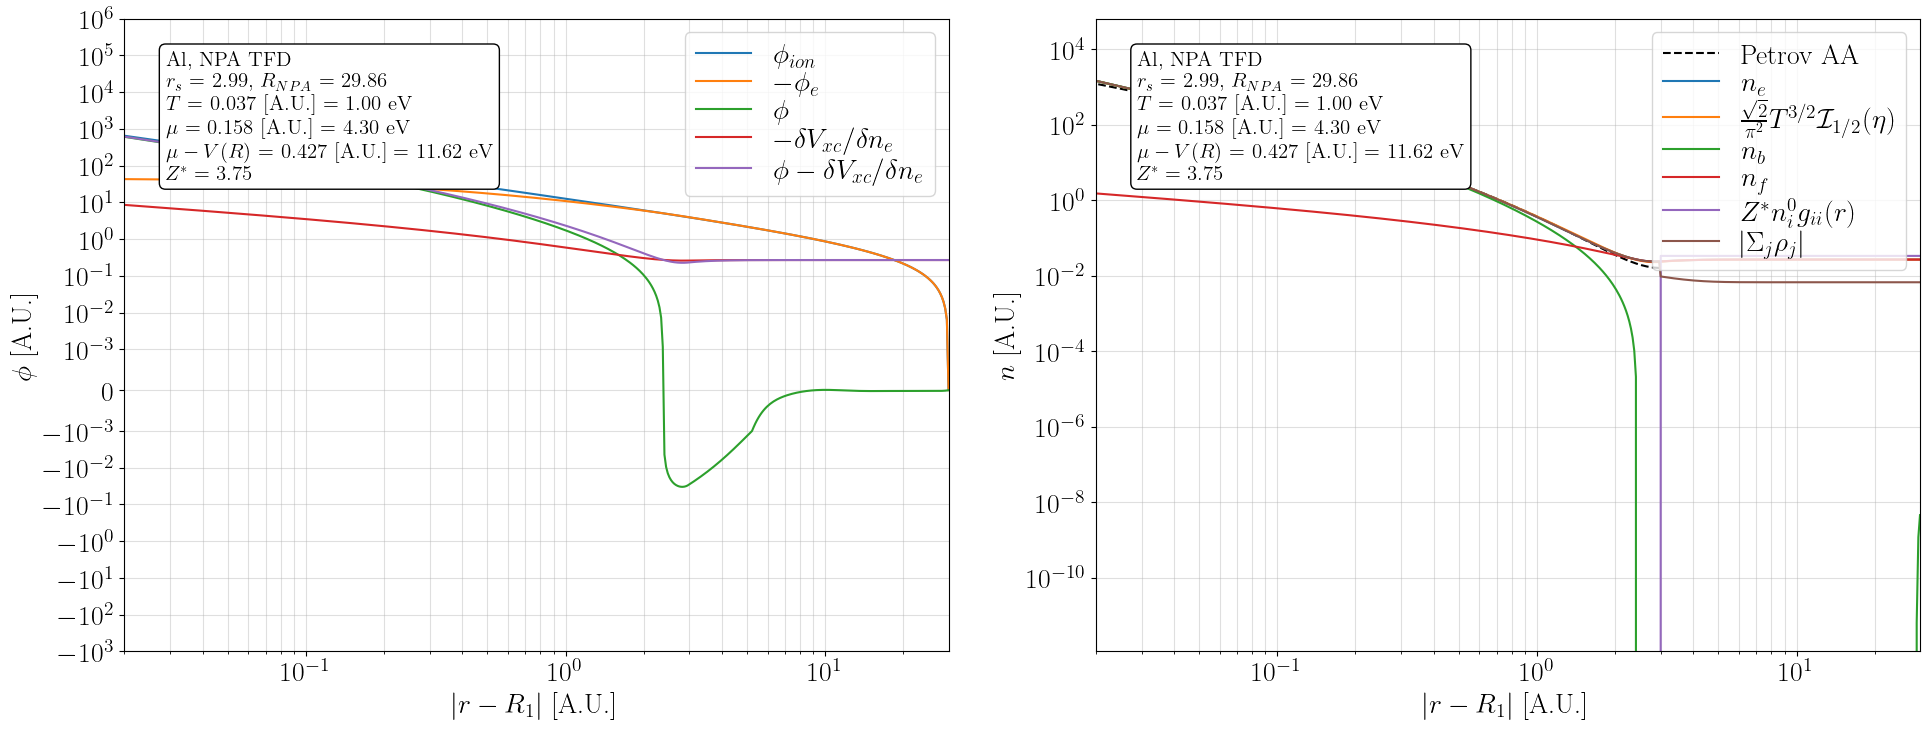

In [6]:
aa_tfd.make_plots()

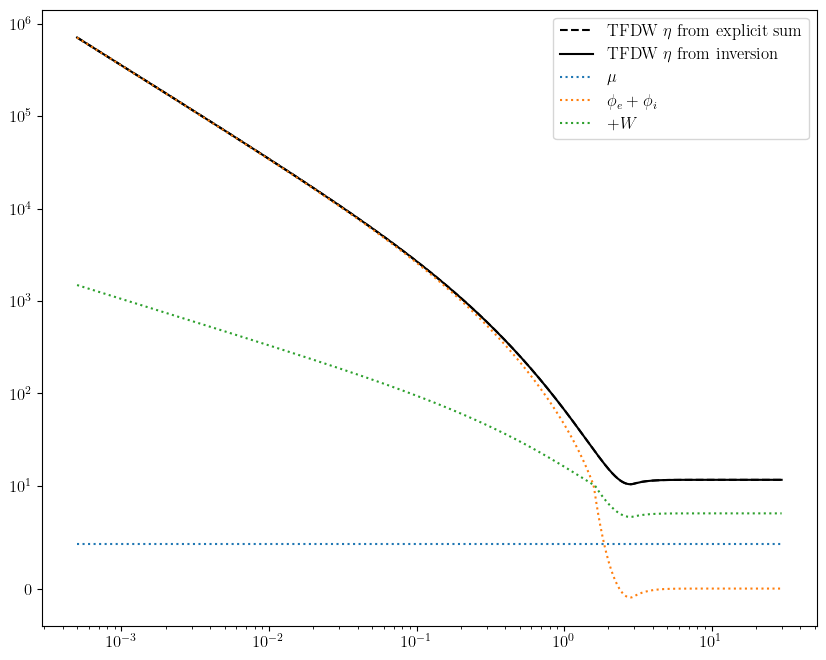

In [45]:
def compare_η(aa):
    fig, ax = plt.subplots(figsize=(10,8))

    # ax.plot(aa_tfd.grid.xs, aa_tfd.get_eta_from_sum(aa_tfd.ne, aa_tfd.μ) -aa_tfd.μ/aa_tfd.T,'k--', label=r'TF $\eta$')
    ax.plot(aa.grid.xs, aa.get_eta_from_sum(aa.ne, aa.μ),'k--', label=r'TFDW $\eta$ from explicit sum') 
    ax.plot(aa.grid.xs, aa.TF.η_interp(aa.ne),'k-', label=r"TFDW $\eta$ from inversion") 

    # pieces
    pieces=[aa.μ*np.ones_like(aa.ne), aa.φe+ aa.φion, - aa.vxc_f(aa.ne) ]
    labels=[r'$\mu$',r'$\phi_{e}+\phi_{i}$',r'$+W$',r'$v_{xc}$']

    for piece, label in zip(pieces, labels): 
        ax.plot(aa.grid.xs, piece/aa.T,':', label=label )


    # plot parameters
    ax.set_yscale('symlog',linthresh=1e1)

    ax.set_xscale('log')
    ax.legend(fontsize=12)
    ax.tick_params(labelsize=12)
    
compare_η(aa_tfd)

<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_6802/2348831821.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if plot is not 'one':


0
370


(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='$r $ [au]', ylabel='$\\gamma = r \\sqrt{n_e}$'>)

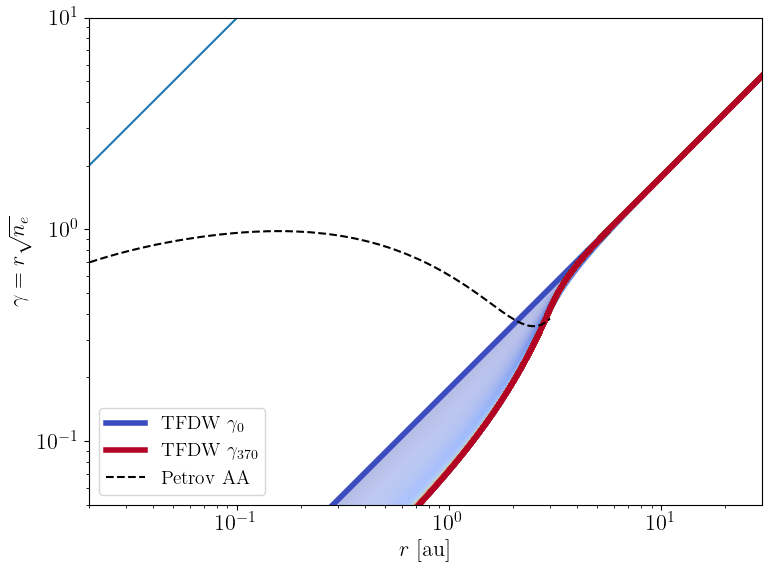

In [146]:
def density_convergence(aa_tfdw, plot='one'):
    if plot=='one':
        fig, axs = plt.subplots(1,1, figsize=(8,6))
        axs = np.array([axs])
    else:
        fig, axs = plt.subplots(1,3, figsize=(24,8))
    ne_list = aa_tfdw.ne_list[::10]
    colors = plt.cm.coolwarm(np.linspace(0, 1,len(ne_list)))

    ax = axs[0]
    for i, ne in enumerate(ne_list):
        if i ==0 or i==len(ne_list)-1:
            print(i)
            ax.plot(aa_tfdw.grid.xs, aa_tfdw.grid.xs*np.sqrt(ne),linewidth=4,color=colors[i],alpha=1, label=r'TFDW $\gamma_{{ {0} }}$'.format(i))
        else:
            ax.plot(aa_tfdw.grid.xs, aa_tfdw.grid.xs*np.sqrt(ne),linewidth=4,color=colors[i],alpha=0.05)
    ax.plot(aa_tfd.petrov.r_data, aa_tfd.petrov.r_data*np.sqrt(aa_tfd.petrov.rho_data + aa_tfd.petrov.rho_0), 'k--', label="Petrov AA")


    ax.plot(aa_tfdw.grid.xs, aa_tfdw.grid.xs*100)
    ax.set_yscale('log')
    ax.set_ylim(5e-2,1e1)
    ax.set_xscale('log')
    ax.set_xlim(np.min(aa_tfdw.grid.xs), R)

    ax.set_ylabel(r"$\gamma = r \sqrt{n_e}$")
    ax.set_xlabel(r"$r $ [au]")
    ax.legend(fontsize=14)
    if plot is not 'one':
        ax = axs[1]
        for i, ne in enumerate(ne_list):
            if i ==0 or i==len(ne_list)-1:
                print(i)
                ax.plot(aa_tfdw.grid.xs, ne,linewidth=4,color=colors[i],alpha=1, label=r'TFDW $\gamma_{{ {0} }}$'.format(i))
            else:
                ax.plot(aa_tfdw.grid.xs, ne,linewidth=4,color=colors[i],alpha=0.05)

        ax.plot(aa_tfd.petrov.r_data, aa_tfd.petrov.rho_data + aa_tfd.petrov.rho_0, 'k--', label="Petrov AA")

        ax.plot(aa_tfdw.grid.xs, aa_tfdw.get_ne_TF(aa_tfdw.ne, aa_tfdw.μ),'k:', label='TF[ne]')


        aa_tfd.grid.integrate_f(aa_tfd.ne)


        # ax.plot(aa_tfd.grid.xs, guess_tfd_ne , 'g:',linewidth=5, label="TFD guess")   

        ax.set_yscale('symlog',linthresh=0.1)
        # ax.set_ylim(-1e4,1e5)
        ax.set_xscale('log')

        ax.set_ylabel(r"$n_e $")
        ax.set_xlabel(r"$r $ [au]")
        ax.legend(fontsize=14)
        ax.set_xlim(np.min(aa_tfdw.grid.xs), R)
        ax = axs[2]
        for i, ne in enumerate(ne_list):
            if i ==0 or i==len(ne_list)-1:
                print(i)
                ax.plot(aa_tfdw.grid.xs, aa_tfdw.grid.xs**2*4*π*ne,linewidth=4,color=colors[i],alpha=1, label=r'TFDW $\gamma_{{ {0} }}$'.format(i))
            else:
                ax.plot(aa_tfdw.grid.xs, aa_tfdw.grid.xs**2*4*π* ne,linewidth=4,color=colors[i],alpha=0.01)        

        ax.plot(aa_tfd.grid.xs, 4*π*aa_tfd.grid.xs**2*aa_tfd.ne, 'g:',linewidth=5, label="TFD")   
        ax.plot(aa_tfd.petrov.r_data, 4*π*aa_tfd.petrov.r_data**2*(aa_tfd.petrov.rho_data + aa_tfd.petrov.rho_0), 'k--', label="Petrov AA")

        # ax.set_yscale('symlog',linthresh=0.1)
        # ax.set_ylim(-1e4,1e5)
        # ax.set_xscale('log')
        ax.set_xlim(np.min(aa_tfdw.grid.xs), R)
        ax.set_ylabel(r"$4 \pi r^2 n_e $")
        ax.set_xlabel(r"$r $ [au]")
        ax.legend(fontsize=14)
    plt.tight_layout()

    return fig, ax


density_convergence(aa_tfd)



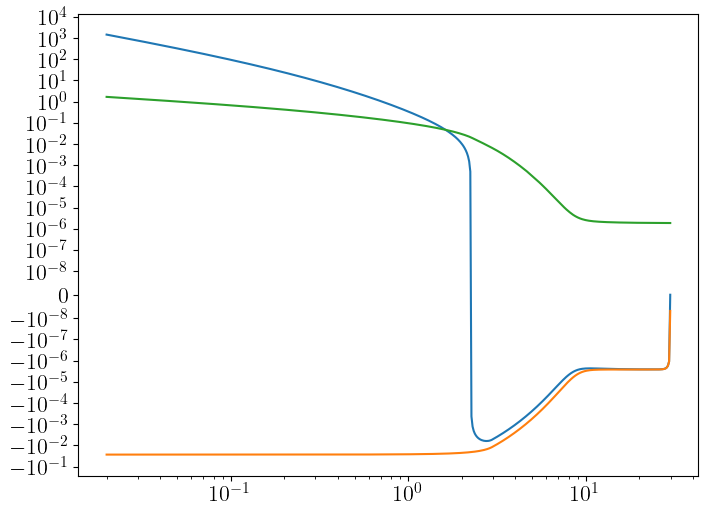

In [154]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(aa_tfd.grid.xs, aa_tfd.ne - aa_tfd.ne[-1] )
ax.plot(aa_tfd.grid.xs, aa_tfd.empty_ne-aa_tfd.ne[-1])
ax.plot(aa_tfd.grid.xs, aa_tfd.δn_f)

ax.set_yscale('symlog', linthresh=1e-8)
ax.set_xscale('log')



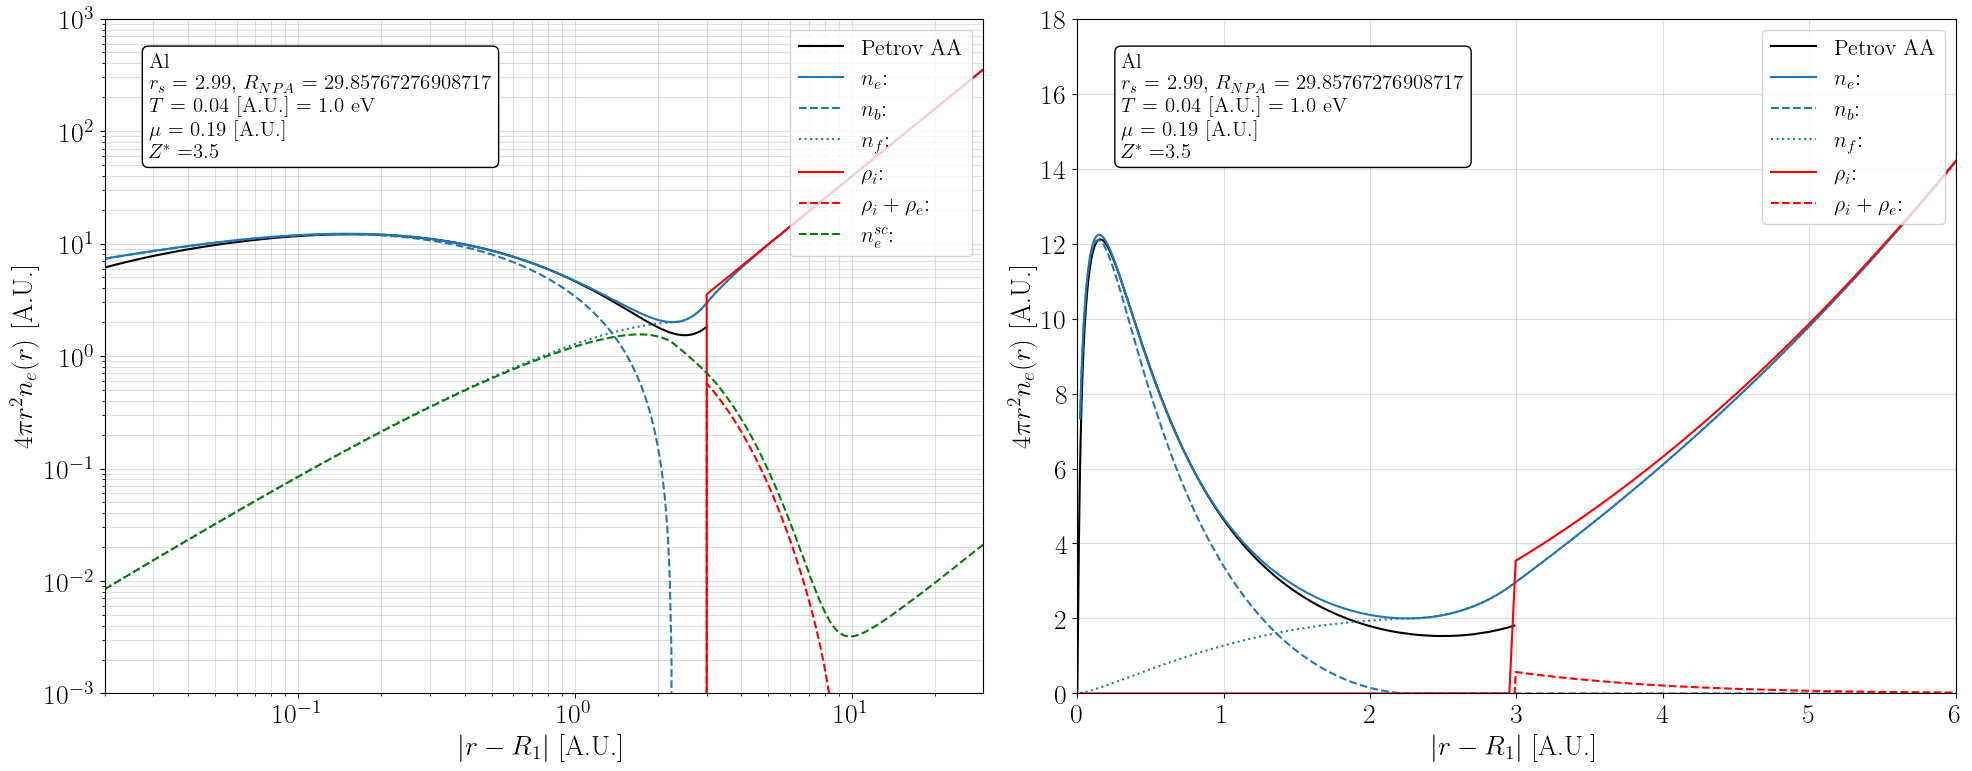

In [179]:

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def make_plot_bound_free(aa, axs=None, name='', color=colors[0]):
    eV = 0.0367512 # So 4 eV = 4 * 0.036.. in natural units
    if axs is None:
        fig, axs = plt.subplots(ncols=2,figsize=(20,8),facecolor='w')

    # Density * 4pi r^2 plot
    factor = 4*np.pi*aa.grid.xs**2
    axs[0].plot(aa.petrov.r_data, 4*np.pi*aa.petrov.r_data**2*(aa.petrov.rho_data + aa.petrov.rho_0), 'k-', label="Petrov AA")
    axs[0].plot(aa.grid.xs, aa.ne*factor ,'-',color=color, label=r'$n_e$: '+ name)
    axs[0].plot(aa.grid.xs, aa.n_b*factor,'--',color=color,  label=r'$n_b$: ' + name)
    axs[0].plot(aa.grid.xs, aa.n_f*factor,':',color=color,  label=r'$n_f$: ' + name)
    axs[0].plot(aa.grid.xs, aa.ρi*factor,'-',color='r',  label=r'$\rho_i$: ' + name)
    axs[0].plot(aa.grid.xs, (aa.ρi-aa.ne)*factor,'--',color='r',  label=r'$\rho_i+\rho_e$: ' + name)
    axs[0].plot(aa.grid.xs, aa.δn_f*factor,'--',color='g',  label=r'$n_e^{sc}$: ' + name)


    axs[0].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[0].set_ylim(1e-3, 1e3)
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')
    axs[0].set_xlim(aa.grid.xs[0],aa.grid.xs[-1])

    
    # Density * 4pi r^2 plot
    factor = 4*np.pi*aa.grid.xs**2
    axs[1].plot(aa.petrov.r_data, 4*np.pi*aa.petrov.r_data**2*(aa.petrov.rho_data + aa.petrov.rho_0), 'k-', label="Petrov AA")
    axs[1].plot(aa.grid.xs, aa.ne*factor ,'-',color=color, label=r'$n_e$: '+ name)
    axs[1].plot(aa.grid.xs, aa.n_b*factor,'--',color=color,  label=r'$n_b$: ' + name)
    axs[1].plot(aa.grid.xs, aa.n_f*factor,':',color=color,  label=r'$n_f$: ' + name)
    axs[1].plot(aa.grid.xs, aa.ρi*factor,'-',color='r',  label=r'$\rho_i$: ' + name)
    axs[1].plot(aa.grid.xs, (aa.ρi-aa.ne)*factor,'--',color='r',  label=r'$\rho_i+\rho_e$: ' + name)
   

    axs[1].set_ylabel(r'$4 \pi r^2 n_e(r) $ [A.U.]',fontsize=20)
    axs[1].set_ylim(0, 18)
    axs[1].set_xlim(0,6)

        
    for ax in axs:
        ax.set_xlabel(r'$|r-R_1|$ [A.U.]',fontsize=20)
        ax.legend(loc="upper right",fontsize=20,labelspacing = 0.1)
        ax.tick_params(labelsize=20)
        ax.grid(which='both',alpha=0.4)

        # make textbox
        text = ("{0}\n".format(aa.name)+ 
            r"$r_s$ = " + "{0},    ".format(np.round(aa.rs,2)) +
            r"$R_{NPA}$ = " + "{0}\n".format(aa.R)  +
                r"$T$ = " + "{0} [A.U.] = {1} eV\n".format(np.round(aa.T,2),np.round(aa.T/eV,2)) + r"$\mu$ = " + "{0} [A.U.]\n".format(np.round(aa.μ,2)) +
                r"$Z^\ast = $" + "{0}".format(np.round(aa.Zstar,2))  )

        props = dict(boxstyle='round', facecolor='w')
        ax.text(0.05,0.95, text, fontsize=15, transform=ax.transAxes, verticalalignment='top', bbox=props)

    plt.tight_layout()
    name = "NPA_densities_{0}_rs{1}_{2}eV_R{3}.png".format(aa.name, np.round(aa.rs,2), np.round(aa.T/eV,2) ,np.round(aa.R))
    plt.savefig("/home/zach/plasma/atomic_forces/average_atom/media/" + name, dpi=300, bbox_inches='tight',facecolor="w")
    
    
    return axs


axs = make_plot_bound_free(aa_tfd, color=colors[0])
# make_plot_bound_free(aa_tfdw_λ1, color=colors[1], axs=axs, name=r'TFDW $(\lambda=1)$')
# make_plot_bound_free(aa_tfdw_λover9, color=colors[2], axs=axs, name=r'TFDW $(\lambda=1/9)$')
for ax in axs:
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), fontsize=16, loc='upper right')
# axs[1].set_ylim(1e-5,1e3)

## HNC and FT

In [6]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['font.size'] =  16

In [8]:
from hnc.hnc.misc import Fermi_Energy, n_from_rs, Debye_length

E_Fermi = Fermi_Energy(aa_tfd.Zstar* n_from_rs(rs))
kF = (2*E_Fermi)**(1/2)
kTF = 1/Debye_length(T_AU,n_from_rs(rs), aa_tfd.Zstar)

def χ0_Lindhard(k):
    ktilde = k/(2*kF) 
    Ndos = kF/π**2
    χ0 = Ndos *(1/2 + 1/(4*ktilde)*(1-ktilde**2)*np.log(abs( (ktilde+1)/(ktilde-1) )) )#Lindhard
    return -χ0

def G_SLFC(k):
    """
    Taylor 1978 - https://iopscience.iop.org/article/10.1088/0305-4608/8/8/011/pdf
    Rewritting their math I get
    χ = χ0/(1-χ0 Uee) for Uee = vee (1-G) and vee = 4π/k**2
      = -Π0/(1 + vee(1-k**2 φ)Π0)
      
    Unforunately, I'm not sure of the sign between χ0 and Π0, so I'm not sure of the overall sign, but G is fine.
    """
    λ = (π*kF)**-1
    φ0 = (1 + 0.1534 * λ)/(4*kF**2)
    G = k**2*φ0
    return G
    
    
def χ_Lindhard(k):
    χ0 = χ0_Lindhard(k)
    vee = 4*π/k**2
    G = G_SLFC(k)
    Uee = vee*(1-G)
    χ_renorm = χ0/(1 - χ0* Uee) 
    return χ_renorm

def χ_TF(k):
    χ_lowk = +k**2/(4*π)* kTF**2/(kTF**2 + k**2)  # Low-k full but full renormalized χ
    vee = 4*π/k**2
    χ_lowk =  -1/( vee + 4*π/kTF**2)  # rewritten
    return χ_lowk


    
# fig, ax = plt.subplots()

# k_dense = np.geomspace(1e-2, 1e2, num=100)

# ax.plot(k_dense, χ0_Lindhard(k_dense))
# ax.plot(k_dense, χ_Lindhard(k_dense))
# ax.axvline(2*kF,color='k')
# # ax.set_yscale('symlog')
# ax.set_xscale('log')
# plt.tight_layout()

In [9]:
def make_φpseudo(aa):
    nf = aa.n_f
    aa.n_f = np.where(aa.n_f<=1e-30, 1e-30, aa.n_f)
        
    etas = aa.TF.η_interp(nf) # η = β( μ + self.φe + self.φion - self.vxc_f(ne)  )         
    totφ_pseudo = etas*aa.T + aa.vxc_f(nf ) - aa.μ # total potential that must be acting on nf
    φe_from_nf, _ = aa.get_φe( -nf + aa.ρi ) # potential from nf itself
    φ_pseudo = (totφ_pseudo - φe_from_nf)
    φ_pseudo = φ_pseudo + aa.Zstar/aa.R #- φ_pseudo[-1] # residual is just potential (and μ) from the ion and bound states
    return φ_pseudo, φe_from_nf, totφ_pseudo

φ_pseudo_TFD, φe_from_nf, totφ_pseudo = make_φpseudo(aa_tfd)

In [10]:
from hnc.hnc.hnc_BandM import Integral_Equation_Solver as IET
from scipy.interpolate import interp1d

Γ = aa_tfd.Zstar**2/T_AU/rs
κ = kTF*rs

iet = IET(1, [3/(4*π)], [T_AU], κ_screen = κ, Γ_matrix = np.array([[Γ]]) , R_max=R/rs, N_bins=1000, dst_type=4)

φ_pseudo_iet = interp1d(aa_tfd.grid.xs/rs, φ_pseudo_TFD , bounds_error=False, fill_value='extrapolate')(iet.r_array)

u_k = 4*π*aa_tfd.Zstar**2/(iet.k_array/rs)**2 + χ_Lindhard(iet.k_array/rs)*rs**6*iet.FT_r_2_k( φ_pseudo_iet )**2# - u_k_Y_approx]])
u_k_matrix = np.array([[  u_k ]])

u_r = iet.FT_k_2_r(u_k)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


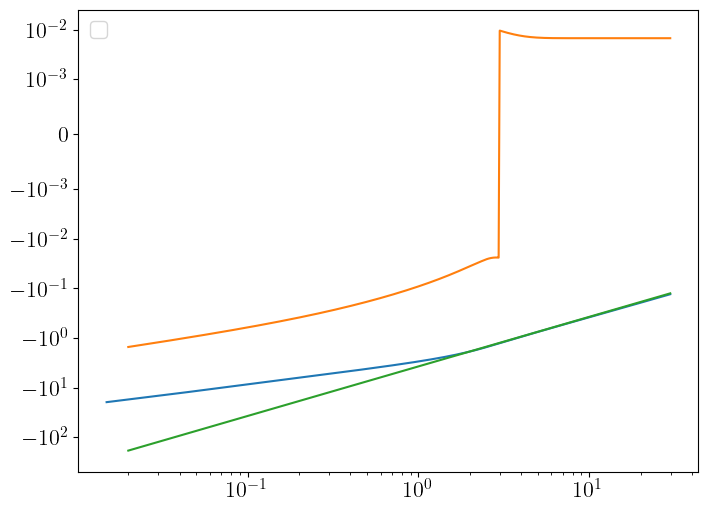

In [15]:


n_sc_r = interp1d(aa_tfd.grid.xs/rs, aa_tfd.δn_f-0*aa_tfd.δn_f[-1] , bounds_error=False, fill_value='extrapolate')(iet.r_array)
φ_pseudo_r = interp1d(aa_tfd.grid.xs/rs, φ_pseudo_TFD , bounds_error=False, fill_value='extrapolate')(iet.r_array)
n_f_r  = interp1d(aa_tfd.grid.xs/rs, aa_tfd.n_f-aa_tfd.n_f[-1], bounds_error=False, fill_value='extrapolate')(iet.r_array)
n_sc_k = iet.FT_r_2_k(n_sc_r)*rs**3
n_f_k = iet.FT_r_2_k(n_f_r)*rs**3
φ_pseudo_k = iet.FT_r_2_k(φ_pseudo_r)*rs**3

χ_k = χ_TF(iet.k_array/rs)
# χ_k = χ_Lindhard(iet.k_array/rs)

Uei_k = n_sc_k/χ_k 
Uei_r = iet.FT_k_2_r(Uei_k/rs**3)

δ_uii_k = Uei_k**2*χ_k
δ_uii_r = iet.FT_k_2_r(δ_uii_k/rs**3)

Zstar_to_use = 3.92
u0ii_k = 4*π*Zstar_to_use**2/(iet.k_array/rs)**2
u0ii_r = iet.FT_k_2_r(u0ii_k/rs**3)

uii_k = u0ii_k + δ_uii_k
uii_r = u0ii_r + δ_uii_r

# Plot and Compare
fig, ax = plt.subplots(figsize=(8,6))


# ax.plot(iet.r_array, -aa_tfd.Zstar/(rs*iet.r_array)  )
# ax.plot(iet.r_array, -Uei_r  )

# ax.plot(aa_tfd.grid.xs, aa_tfd.δn_f)
# ax.plot(iet.r_array, n_sc_r ,'--.' )
# ax.plot(iet.k_array, n_sc_k-0*aa_tfd.Zstar ,'--.' ,label=r"$\lim_{{k\to 0}} n_{{screen}} = {:0.3f}$".format(n_sc_k[0]))
# ax.plot(iet.k_array, n_f_k-0*aa_tfd.Zstar ,'--.' ,label=r"$\lim_{{k\to 0}} n_{{f}} = {:0.3f}$".format(n_f_k[0]))

# ax.plot(iet.r_array, n_sc_r)
# ax.plot(iet.r_array, n_f_r)

# ax.plot(iet.k_array, Uei_k ,'--.' ) # Need to muultiply by some rs power???
# ax.plot(iet.k_array, 4*π*aa_tfd.Zstar**1/(iet.k_array/rs)**2 ,'--.' )
# ax.plot(iet.k_array,u_ii_k ,'--.' ) # Need to muultiply by some rs power???
# ax.plot(iet.k_array, -δ_uii_k ,'--.' ) # Need to muultiply by some rs power???

ax.plot(iet.r_array*rs,Uei_r)
ax.plot(aa_tfd.grid.xs, -aa_tfd.n_f + aa_tfd.ρi)
ax.plot(aa_tfd.grid.xs, -aa_tfd.Zstar/aa_tfd.grid.xs)


# ax.plot(iet.r_array, u0ii_r ,'--.' ) # Need to muultiply by some rs power???
# ax.plot(iet.r_array,-δ_uii_r ,'--.' ) # Need to muultiply by some rs power???
# ax.plot(iet.r_array,uii_r ,'--.' ) # Need to muultiply by some rs power???
# ax.plot(iet.r_array,-φ_pseudo_iet ,'--.' ) # Need to muultiply by some rs power???

# ax.plot(iet.r_array,(Zstar_to_use/aa_tfd.Zstar)**2* T_AU*Γ/iet.r_array*np.exp(-κ*iet.r_array))

# ax.plot(iet.k_array, u0ii_k ,'--.' ) # Need to muultiply by some rs power???
# ax.plot(iet.k_array,-δ_uii_k ,'--.' ) # Need to muultiply by some rs power???
# ax.plot(iet.k_array,uii_k ,'--.' ) # Need to muultiply by some rs power???
# ax.plot(iet.k_array, u0ii_k+δ_uii_k ,'--.' ) # Need to muultiply by some rs power???



ax.set_yscale('symlog',linthresh=1e-3)
ax.set_xscale('log')
ax.legend()